In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing the dataset
df = pd.read_csv('/content/credit_customers.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


#Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [ ]:
def count_unique_values(df):
    categorical_unique_values = {}
    numerical_unique_values = {}

    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].nunique()
            categorical_unique_values[column] = unique_values
        else:
            unique_values = df[column].nunique()
            numerical_unique_values[column] = unique_values

    print("Categorical columns:")
    for column, unique_values in categorical_unique_values.items():
        print(f"{column}: {unique_values}")

    print("\nNumerical columns:")
    for column, unique_values in numerical_unique_values.items():
        print(f"{column}: {unique_values}")


count_unique_values(df)

Categorical columns:
checking_status: 4
credit_history: 5
purpose: 10
savings_status: 5
employment: 5
personal_status: 4
other_parties: 3
property_magnitude: 4
other_payment_plans: 3
housing: 3
job: 4
own_telephone: 2
foreign_worker: 2
class: 2

Numerical columns:
duration: 33
credit_amount: 921
installment_commitment: 4
residence_since: 4
age: 53
existing_credits: 4
num_dependents: 2


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

# EDA

<Axes: title={'center': 'Features num_dependents'}, xlabel='num_dependents', ylabel='count'>

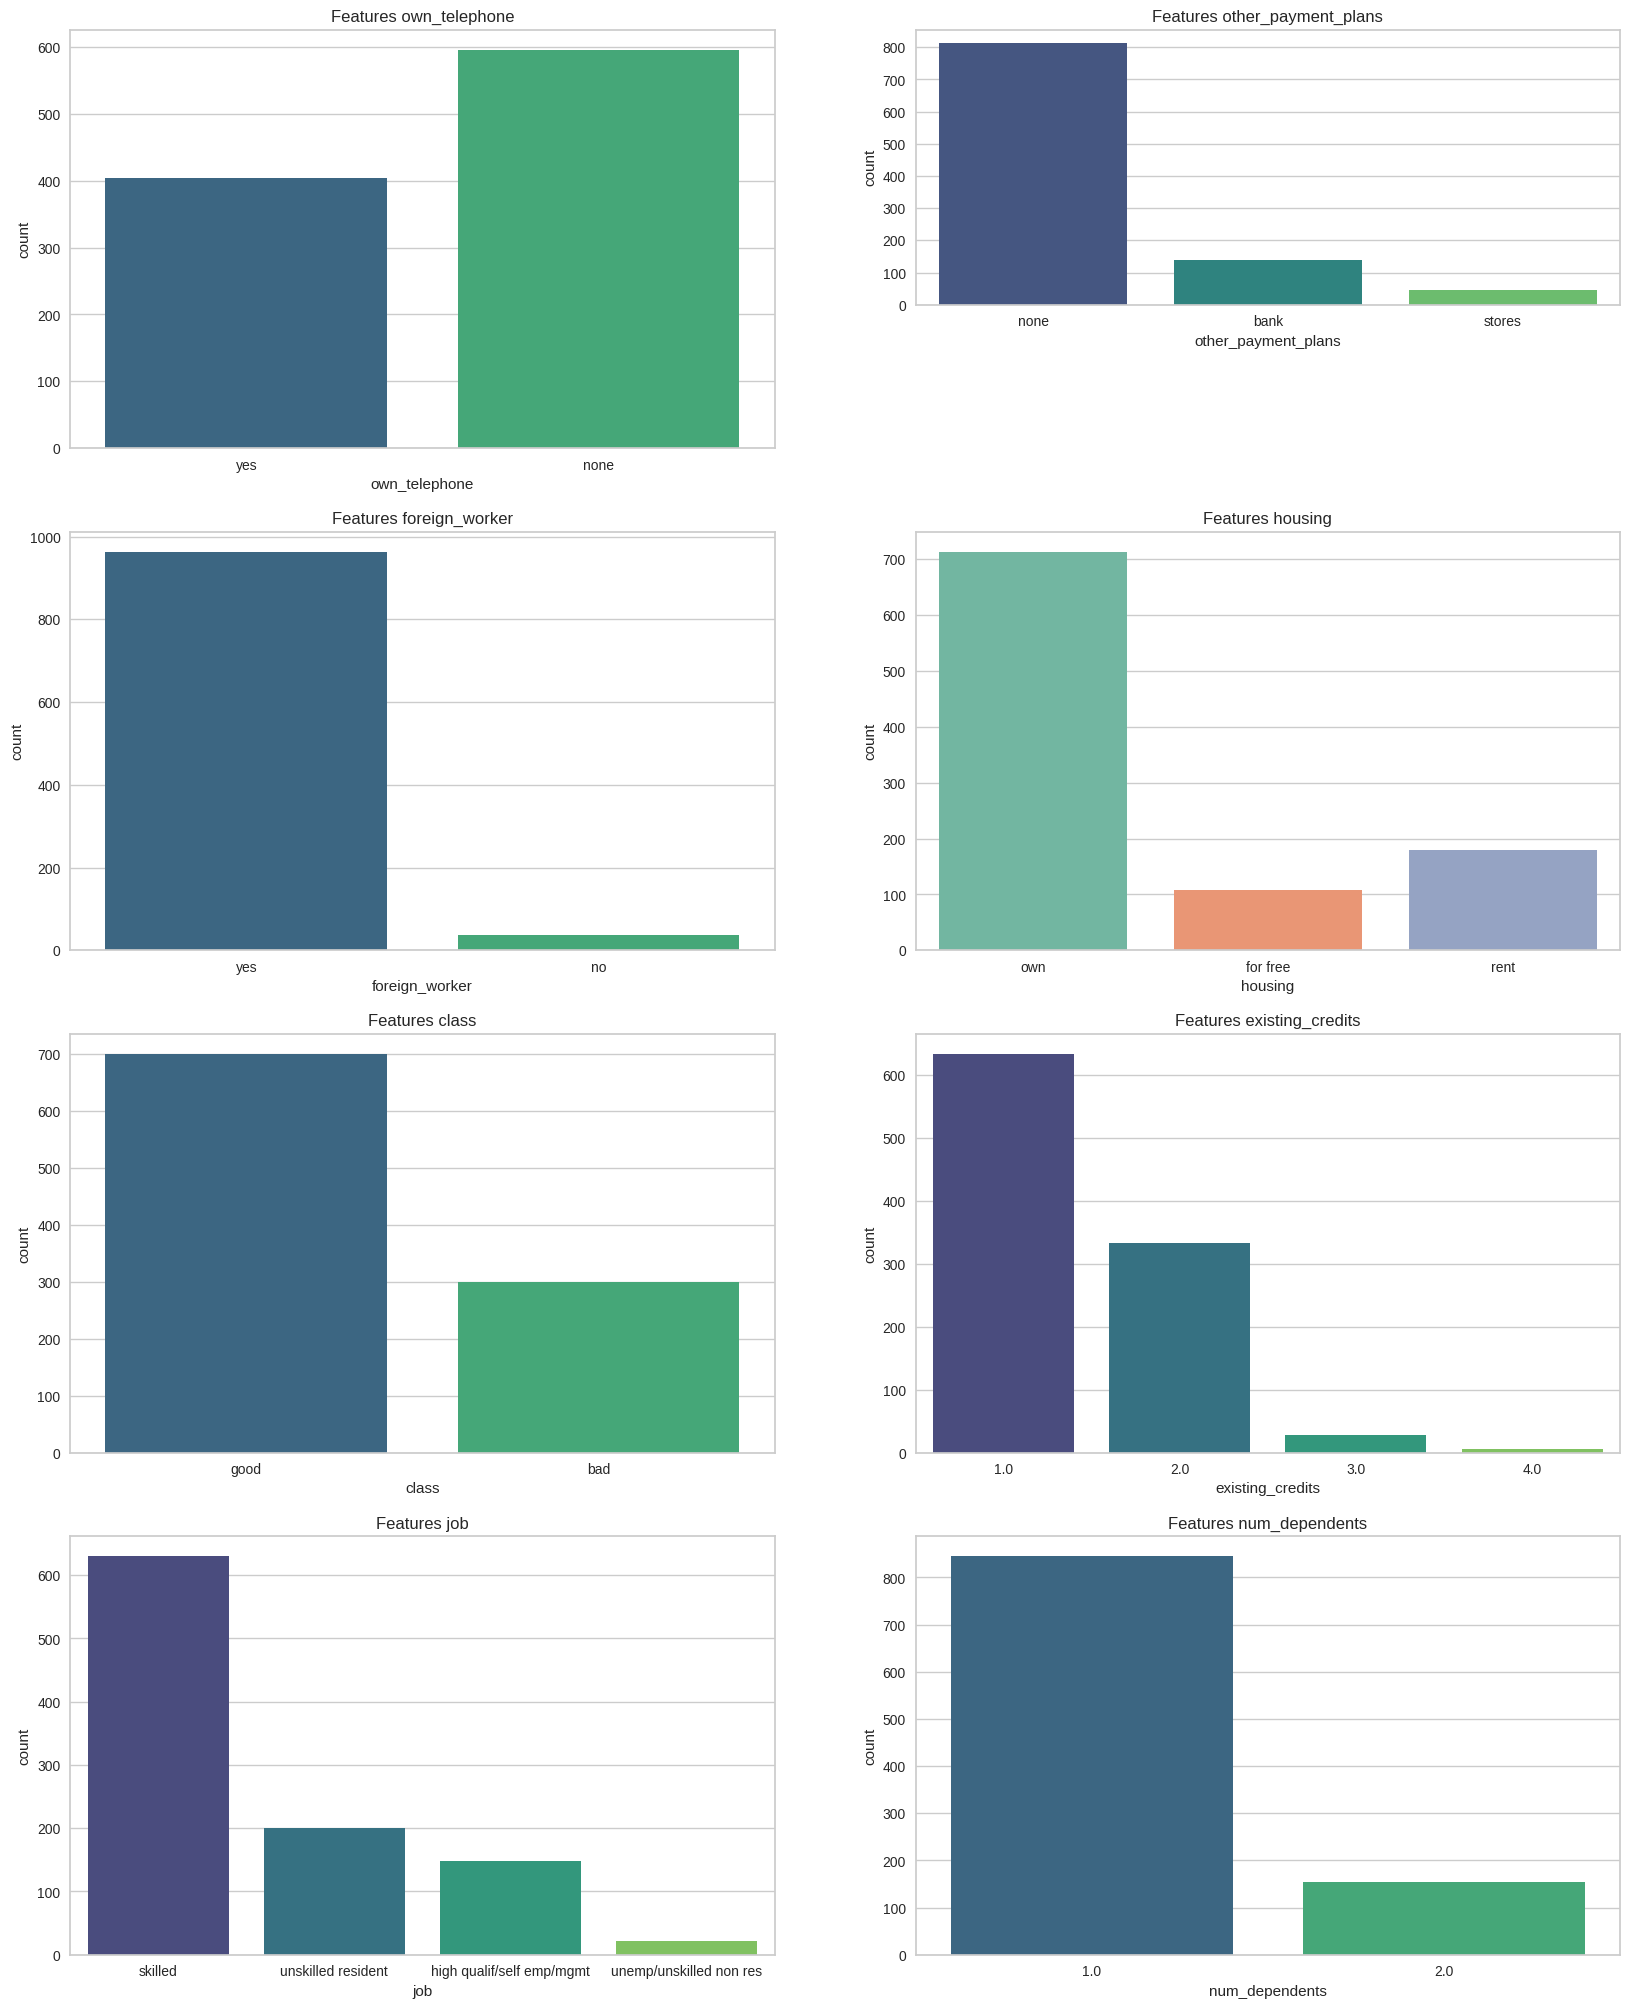

In [ ]:
plt.figure(figsize = (20, 25))

plt.subplot(4, 2, 1)
plt.gca().set_title('Features own_telephone')
sns.countplot(x = 'own_telephone', palette = 'viridis', data = df)

plt.subplot(6, 2, 2)
plt.gca().set_title('Features other_payment_plans')
sns.countplot(x = 'other_payment_plans', palette = 'viridis', data = df)


plt.subplot(4, 2, 3)
plt.gca().set_title('Features foreign_worker')
sns.countplot(x = 'foreign_worker', palette = 'viridis', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Features housing')
sns.countplot(x = 'housing', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Features class')
sns.countplot(x = 'class', palette = 'viridis', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Features existing_credits')
sns.countplot(x = 'existing_credits', palette = 'viridis', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Features job')
sns.countplot(x = 'job', palette = 'viridis', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Features num_dependents')
sns.countplot(x = 'num_dependents', palette = 'viridis', data = df)

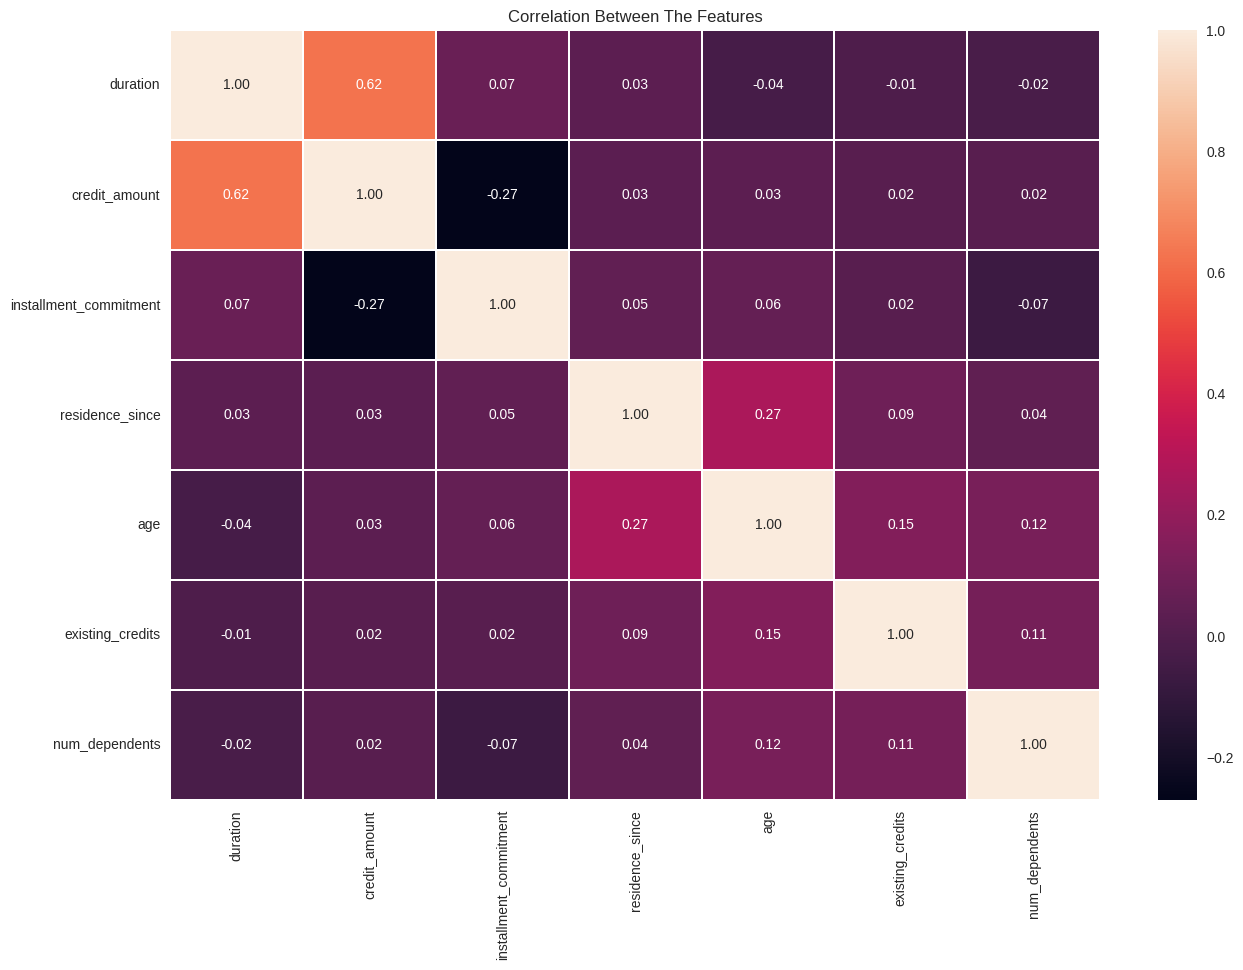

In [ ]:
#menentukan korelasi antar Features 
fig=plt.gcf()
fig.set_size_inches(15, 10)
plt.title('Correlation Between The Features')
a = sns.heatmap(df.corr(), annot = True, annot_kws={"size": 10}, fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.show()

# Data Preprocessing

#Feature Elimination

In [ ]:
#Menghapus features yang memiliki korelasi rendah
df = df.drop('num_dependents', axis=1)
df = df.drop('foreign_worker', axis=1)

#Label Encoding

In [ ]:
df['class'].replace(['good', 'bad'], [1,0], inplace = True)
df['personal_status'].replace(['male single','female div/dep/mar','male div/sep','male mar/wid'], [0,1,2,3], inplace = True)
df['purpose'].replace(['business', 'new car','used car', 'education', 'retraining', 'other','domestic appliance','radio/tv','furniture/equipment','repairs'], [0,1,2,3,4,5,6,7,8,9], inplace = True)
df['savings_status'].replace(['no known savings', '<100','100<=X<500','500<=X<1000','>=1000'], [0,1,2,3,4], inplace = True)
df['own_telephone'].replace(['yes', 'none'], [1,0], inplace = True)
#df['foreign_worker'].replace(['yes', 'no'], [1,0], inplace = True)
df['employment'].replace(['unemployed', '<1','1<=X<4','4<=X<7','>=7'], [0,1,2,3,4], inplace = True)
df['property_magnitude'].replace(['no known property', 'life insurance', 'car', 'real estate'], [0,1,2,3], inplace = True)
df['checking_status'].replace(['no checking', '<0', '0<=X<200', '>=200'], [0,1,2,3], inplace = True)
df['credit_history'].replace(['critical/other existing credit', 'delayed previously' , 'existing paid', 'no credits/all paid', 'all paid'], [0,1,2,3,4], inplace = True)
df['other_payment_plans'].replace(['none', 'stores', 'bank'], [0,1,2], inplace = True)
df['job'].replace(['unemp/unskilled non res', 'unskilled resident', 'skilled', 'high qualif/self emp/mgmt'], [0,1,2,3], inplace = True)
df['housing'].replace(['for free', 'rent', 'own'], [0,1,2], inplace = True)
df['other_parties'].replace(['none', 'co applicant', 'guarantor'], [0,1,2], inplace = True)


In [ ]:
df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,own_telephone,class
0,1,6.0,0,7,1169.0,0,4,4.0,0,0,4.0,3,67.0,0,2,2.0,2,1,1
1,2,48.0,2,7,5951.0,1,2,2.0,1,0,2.0,3,22.0,0,2,1.0,2,0,0
2,0,12.0,0,3,2096.0,1,3,2.0,0,0,3.0,3,49.0,0,2,1.0,1,0,1
3,1,42.0,2,8,7882.0,1,3,2.0,0,2,4.0,1,45.0,0,0,1.0,2,0,1
4,1,24.0,1,1,4870.0,1,2,3.0,0,0,4.0,0,53.0,0,0,2.0,2,0,0
5,0,36.0,2,3,9055.0,0,2,2.0,0,0,4.0,0,35.0,0,0,1.0,1,1,1
6,0,24.0,2,8,2835.0,3,4,3.0,0,0,4.0,1,53.0,0,2,1.0,2,0,1
7,2,36.0,2,2,6948.0,1,2,2.0,0,0,2.0,2,35.0,0,1,1.0,3,1,1
8,0,12.0,2,7,3059.0,4,3,2.0,2,0,4.0,3,61.0,0,2,1.0,1,0,1
9,2,30.0,0,1,5234.0,1,0,4.0,3,0,2.0,2,28.0,0,2,2.0,3,0,0


#MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature = [ 'duration', 'credit_amount', 'age']
df[feature] = scaler.fit_transform(df[feature])

#Feature Selection & Balancing Class using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = df.drop('class', axis=1)
y = df['class']
X, y = smote.fit_resample(X, y)
df = pd.concat([X, y], axis=1)

#Train Test splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [ ]:
X_train.shape, y_train.shape

((1120, 18), (1120,))

#Modelling

#Logistic Regression Model

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred1 = logreg.predict(X_test)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
report1 = classification_report(y_test, pred1)
print("Classification Report Logistic Regression:\n", report1)


Accuracy of Logistic Regression classifier on training set: 0.71
Accuracy of Logistic Regression classifier on test set: 0.71
Classification Report Logistic Regression:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71       131
           1       0.76      0.67      0.71       149

    accuracy                           0.71       280
   macro avg       0.72      0.72      0.71       280
weighted avg       0.72      0.71      0.71       280



0.7142857142857143

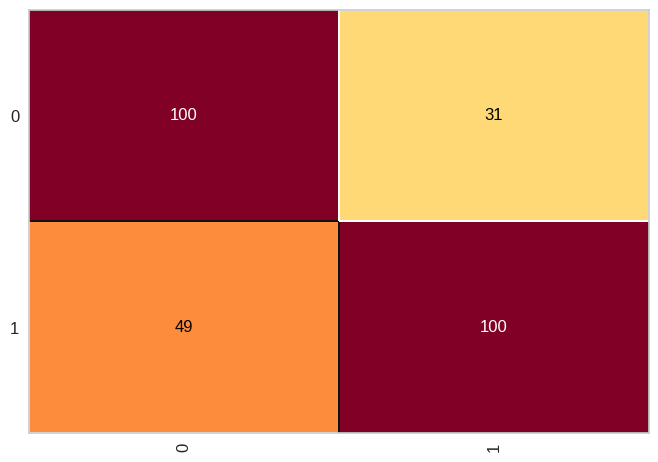

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = ConfusionMatrix(logreg)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

#K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# List kosong untuk menyimpan model data pada setiap nilai K
test_scores = [] 
train_scores = []

# Mengulang dari 1 - 14
for i in range(1,15):

    knn = KNeighborsClassifier(i) 
    knn.fit(X_train,y_train)
    
    # Menghitung skor akurasi KNN dan ditambahkan ke test_scores
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## skor yang berasal dari pengujian pada titik data yang sama yang digunakan untuk Train
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## skor yang berasal dari Train pada titik data yang dipisah pada titik awal untuk digunakan dipengujian
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 78.57142857142857 % and k = [1]


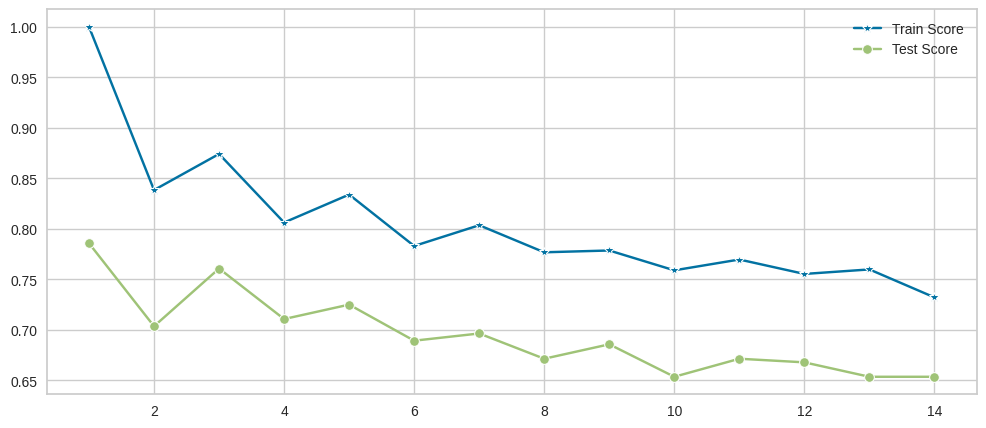

In [ ]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')

In [ ]:
# KNN Classifer dengan K Neighbors
knn = KNeighborsClassifier(11) # akan mencari 8 tetangga terdekat untuk setiap sample terdekat

knn.fit(X_train,y_train)
pred2 = knn.predict(X_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train,	y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test,	y_test)))
report2 = classification_report(y_test, pred2)
print("Classification Report KNN:\n", report2)

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.67
Classification Report KNN:
               precision    recall  f1-score   support

           0       0.60      0.86      0.71       131
           1       0.81      0.50      0.62       149

    accuracy                           0.67       280
   macro avg       0.71      0.68      0.67       280
weighted avg       0.71      0.67      0.66       280



0.6714285714285714

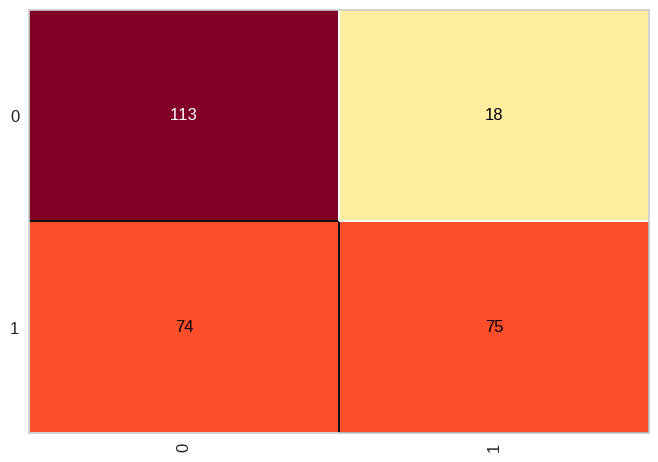

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

#Extreme Gradient Boost Classifier

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
# Classification model
xgbc = XGBClassifier(learning_rate=0.15,n_estimators=300,max_depth=5, subsample=0.5)

In [ ]:
xgbc.fit(X_train,y_train)
pred3 = xgbc.predict(X_test)
print('Accuracy of Extreme Gradient Boost Classifier on training set: {:.2f}'.format(xgbc.score(X_train,	y_train)))
print('Accuracy of Extreme Gradient Boost Classifier on test set: {:.2f}'.format(xgbc.score(X_test,	y_test)))
report3 = classification_report(y_test, pred3)
print("Classification Report of Extreme Gradient Boost Classifier:\n", report3)

Accuracy of Extreme Gradient Boost Classifier on training set: 1.00
Accuracy of Extreme Gradient Boost Classifier on test set: 0.85
Classification Report of Extreme Gradient Boost Classifier:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       131
           1       0.86      0.86      0.86       149

    accuracy                           0.85       280
   macro avg       0.85      0.85      0.85       280
weighted avg       0.85      0.85      0.85       280



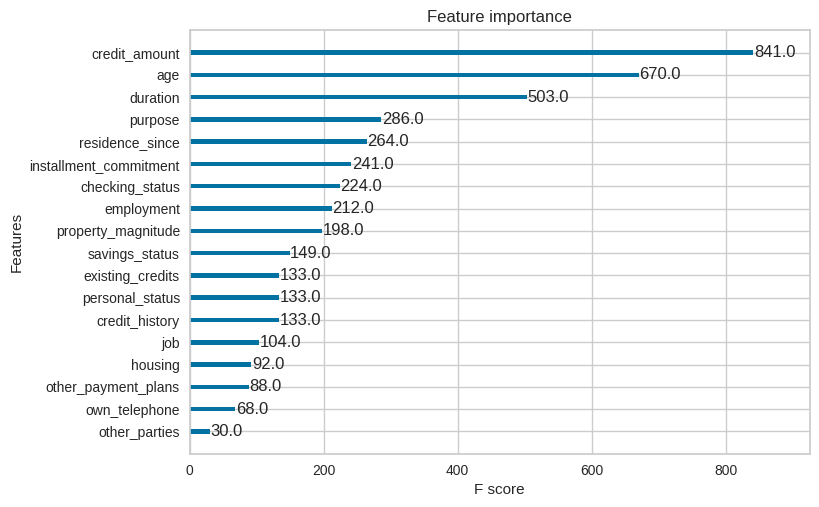

In [ ]:
xgb.plot_importance(xgbc)
plt.show()

0.8535714285714285

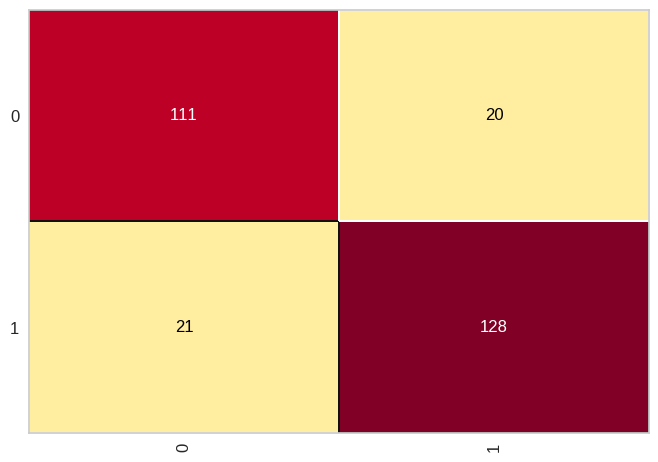

In [ ]:
cm = ConfusionMatrix(xgbc)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [303]:
xgbc.save_model('model.json')